## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../input/clean_train.csv")
test = pd.read_csv("../input/test.csv")
all_data = [train, test]

## Explore cabin notation

In [3]:
print("TRAIN CABIN NULL VALUES: ", train["Cabin"].isnull().sum())
print("TEST CABIN NULL VALUES: ", test["Cabin"].isnull().sum())

TRAIN CABIN NULL VALUES:  680
TEST CABIN NULL VALUES:  327


In [4]:
train["Cabin"][train["Cabin"].notnull()].head(20)

1          C85
3         C123
6          E46
10          G6
11        C103
21         D56
23          A6
30         B78
51         D33
53         B30
54         C52
60         B28
61         C83
65         F33
74       F G73
90         E31
94          A5
95     D10 D12
100        D26
108       C110
Name: Cabin, dtype: object

In [5]:
train["Cabin"].value_counts()

B96 B98    4
G6         4
C22 C26    3
D          3
F33        3
          ..
C87        1
A26        1
A10        1
E68        1
A32        1
Name: Cabin, Length: 147, dtype: int64

## Make a letter column

In [6]:
train["Letter"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train["Cabin"] ])
test["Letter"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test["Cabin"] ])

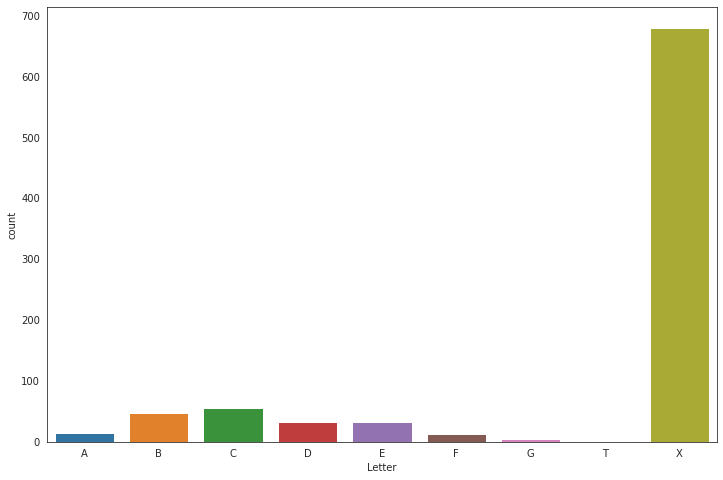

In [7]:
with sns.axes_style("white"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.countplot(x=train["Letter"], order=['A','B','C','D','E','F','G','T','X'])

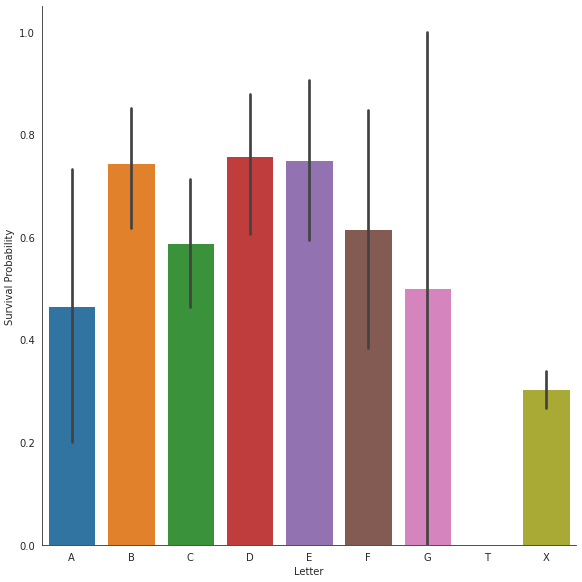

In [8]:
with sns.axes_style("white"):
    g = sns.catplot(y="Survived", x="Letter",data=train,kind="bar",order=['A','B','C','D','E','F','G','T','X'], height=8)
    g = g.set_ylabels("Survival Probability")

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,X


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,X
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,X
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,X
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,X
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,X


## Export data

In [11]:
train["Letter"].to_csv("../input/train_values/cabin.csv", header=["Cabin"], index=False)

In [12]:
test["Letter"].to_csv("../input/test_values/cabin.csv", header=["Cabin"], index=False)